# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [1]:
import sklearn

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


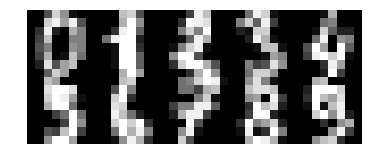

In [3]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [4]:
def prediction_function(x,theta):
    ex = exp(-dot(theta.T,x))
    return 1/(1+ ex)

In [29]:
def cost_function(x_predict,y):
    cost = (y*log(x_predict)) + (1-y)*log(1-x_predict)
    J = sum(cost) / (x.shape[0])
    return cost

    




In [30]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    dtheta = outer((x_predict - y),x)
    return dtheta  
    

correct tests   percentage correctly classified   number of iterations
251             84.51                             0
254             85.52                             1
255             85.86                             2
256             86.20                             3
257             86.53                             4
257             86.53                             5
259             87.21                             6
260             87.54                             7
260             87.54                             8
260             87.54                             9
261             87.88                             10
260             87.54                             11
259             87.21                             12
259             87.21                             13
259             87.21                             14
260             87.54                             15
259             87.21                             16
259             87.21                 

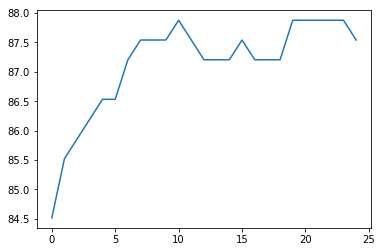

87.54208754208754


In [69]:
#Variables
start_iterations = 25
theta = np.zeros((64,10))
stop_condition = 1
cost = 10
alpha = 0.001



x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))


#These are the target datasets
target = digits.target[:1500] #the first 1500 are for the training
target_test = digits.target[1500:] #the rest is for the testing



def optimaltheta(x, target, theta, iterations, alpha):          #Apply gradient descent and find the optimal values of theta
    cost_list = []                                              #we create an "empty" list for the cost function       
    for i in range(iterations):                                 #
        cost = 0                                                #we start the cost at 0
        for j in range(x.shape[0]):                             
            x_predict = prediction_function(x[j,:],theta)       #we compute x_predict for all the iterations we go through
            y = np.zeros(10)                                    #we create an "initial" y vector of shape(10,) 
               
            
            y[target[j]] = 1                                    #we replace the 0 by a 1 at the index of the "which target it is"
            #set the right class (right number) equal to 1
            cost += cost_function(x_predict,y)                  #we sum the costs up together
            
    
            dtheta = compute_gradient(x_predict, y, x[j,:])     #we compute dtheta using gradient descend
            #this is the partial derivative of the cost function
            
            theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))
            #here we run gradient descend 
            #found the values for theta for which the cost function is the smallest
                      
    return theta

def plotcost(x_predict):
    cost_list = []
    for i in range(iterations):
        cost = 0
        for j in range(x.shape[0]):
            cost += cost_function(x_predict,y)
        cost_list.extend([cost])
    plt.plot(np.arange(iterations), cost_list)




def plotcosttest(x,theta):
    cost_list_test = []
    for i in range(iterations):
        cost = 0
        for j in range(x_test.shape[0]):
            cost += cost_function(x_predict, y, x[j,:])
        cost_list_test.extend([cost])
    plt.plot(np.arrange(iterations),cost_list_test)
        
    
def howmanycorrect(x, target, theta):
    correct = 0
    for j in range(x_test.shape[0]): 
        x_predict_test = prediction_function(x[j,:], theta)
        if x_predict_test.argmax() == target[j]: #check if the highest 
            #prediction is the same as the target
            correct += 1
    return correct
        
accuracy_list = []        
iterations = start_iterations

print("correct tests", " ", "percentage correctly classified"," ", "number of iterations")
for i in range(iterations):
    theta = optimaltheta(x, target, theta, iterations, alpha)                   #Do the gradient decent
    correct_tests = howmanycorrect(x_test, target_test, theta)                   #Find the amount of correct test
    percent = float(correct_tests) / x_test.shape[0] *100                 #Calculate the percentage of the correct tests
    accuracy_list.append(percent)                                                   #Save the percentage for this iteration
    print (correct_tests, "           ", ("%.2f" % percent),"                           ", i)
    

#make a graph of the percentages against the iterations
iterations_list = []
for i in range(iterations): 
    iterations_list.append(i)
    
plt.plot(range(iterations), accuracy_list)
plt.show()    

#print the final percentage of good classifications
print(percent) 

#now we want to plot the cost for the test 



        

    


ValueError: x and y must have same first dimension, but have shapes (25,) and (12,)

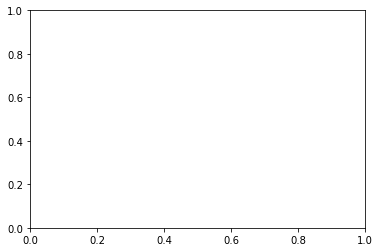

In [68]:
plt.plot(range(iterations), accuracy_list)
plt.show()

find the best alphas 

In [63]:
#to find the best alphas we plot the cost function 
theta1 = optimaltheta(x, target, theta, 25, 0.1)
theta2 = optimaltheta(x, target, theta, 25, 0.0001)


overfitting

In [64]:
optimaltheta(x,y, 25, 10)#optimumalpha
x_test_cost(x_test, optimaltheta(x,y,25,10))
            

NameError: name 'y' is not defined

best score analysis

In [66]:
best_iteration()

correct tests   percentage correctly classified   number of iterations


TypeError: optimaltheta() missing 1 required positional argument: 'alpha'

In [ ]:
plotcost